In [1]:
import csv
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
%matplotlib inline

lines = []
with open('C:\\big\p3\\data\\driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

images = []
measurements = []
data_folder = 'C:\\big\\p3\\data\\'
counter = 1
for line in lines:
    steering   = float(line[3])
    img_center = line[0]
    img_left   = line[1]
    img_right  = line[2]

    if counter % 3 == 0:
        center = cv2.imread(data_folder + img_center)
        center = cv2.cvtColor(center, cv2.COLOR_BGR2RGB)
        images.append(center)
        measurements.append(steering)
        images.append(np.fliplr(center))
        measurements.append(steering * -1.0)


    left   = cv2.imread(data_folder + img_left)
    left   = cv2.cvtColor(left, cv2.COLOR_BGR2RGB)
    images.append(left)
    measurements.append(steering + 0.2)

    right  = cv2.imread(data_folder + img_right)
    right  = cv2.cvtColor(right, cv2.COLOR_BGR2RGB)
    images.append(right)
    measurements.append(steering - 0.2)
    
    if counter % 2 == 0:
        #print('even')
        images.append(np.fliplr(left))
        images.append(np.fliplr(right))
        measurements.append((steering + 0.1) * -2.0)
        measurements.append((steering - 0.1) * -2.0)
    #else:
        #print('odd')

    counter = counter + 1
    #steering = float(line[3])

np.save('images_v2', images)
np.save('measurements_v2', measurements)
#np.save('valid_2', x_valid2)

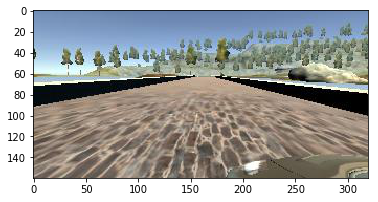

0.21391724


In [2]:
numb = 410
plt.imshow(images[numb])
plt.show()
print(measurements[numb])